In [28]:
import requests
import json
total_news = 500
dict_item={}

for start_id in range(0,total_news,100):
    print("start_id: ",start_id)
    url ='https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID='+str(start_id)+'&len=100'
    print(url)
    r = requests.get(url)
    if start_id==0:
        total_api = json.loads(r.text)
    else:
        api=json.loads(r.text)
        total_api['items'].extend(api['items'])
    print("len: ",len(total_api['items']))
    i=0
    

start_id:  0
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=0&len=100
len:  100
start_id:  100
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=100&len=100
len:  200
start_id:  200
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=200&len=100
len:  300
start_id:  300
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=300&len=100
len:  400
start_id:  400
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=400&len=100
len:  500


In [ ]:
print(total_api['items'][i].keys())
n = 0
for i in range(0,120):
    if 'bucketgrpids' in total_api['items'][i].keys():
        n=n+1
        print(i , total_api['items'][i]['bucketgrpids'])
print(n)

In [29]:
#print(api.keys())

dict_item={}
for item in total_api['items']:
    for key, val in item.items():
        #print(key,val)
        if key in dict_item:
            dict_item[key].append(val)
        else:
            dict_item[key] = [val]
dict_grp={}
totalscore = 0
print(len(dict_item['bucketgrpids']))
dict_grp['others'] = total_news-float(len(dict_item['bucketgrpids']))
for new_id in range(0,len(dict_item['bucketgrpids'])):
    print(new_id,dict_item['bucketgrpids'][new_id])
    weight = 1/len(dict_item['bucketgrpids'][new_id])
    print(weight)
    for grp_key in dict_item['bucketgrpids'][new_id]:
        if grp_key in dict_grp:
            dict_grp[grp_key]=float(dict_grp[grp_key])+weight
        else:
            dict_grp[grp_key] = float(weight)
        totalscore = totalscore+float(weight)
        #print(totalscore)
print(dict_grp)
print(totalscore)
#print(len(api['items']))
#print(len(dict_item['bucketgrpids']))

313
0 ['WhiteCollar_tw', 'business_tw', 'tech_tw']
0.3333333333333333
1 ['3CExpert_tw', 'tech_tw']
0.5
2 ['3CExpert_tw', 'tech_tw']
0.5
3 ['3CExpert_tw', 'tech_tw']
0.5
4 ['WhiteCollar_tw']
1.0
5 ['WhiteCollar_tw']
1.0
6 ['3CExpert_tw', 'tech_tw']
0.5
7 ['WhiteCollar_tw', 'business_tw', 'tech_tw']
0.3333333333333333
8 ['3CExpert_tw', 'tech_tw']
0.5
9 ['InternationalFinance_tw', 'business_tw']
0.5
10 ['tech_tw']
1.0
11 ['WhiteCollar_tw', 'business_tw']
0.5
12 ['WhiteCollar_tw', 'tech_tw']
0.5
13 ['tech_tw']
1.0
14 ['tech_tw']
1.0
15 ['tech_tw']
1.0
16 ['tech_tw']
1.0
17 ['WhiteCollar_tw', 'business_tw', 'tech_tw']
0.3333333333333333
18 ['InternationalFinance_tw', 'business_tw']
0.5
19 ['WhiteCollar_tw', 'business_tw']
0.5
20 ['WhiteCollar_tw', 'business_tw', 'tech_tw']
0.3333333333333333
21 ['Hedonism_tw', 'life_tw', 'tech_tw']
0.3333333333333333
22 ['tech_tw']
1.0
23 ['tech_tw']
1.0
24 ['WhiteCollar_tw', 'business_tw', 'tech_tw']
0.3333333333333333
25 ['WhiteCollar_tw', 'business_tw']


In [ ]:
import matplotlib.pyplot as plt
labels = dict_grp.keys()
size = dict_grp.values()
plt.pie(size , labels = labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()
recipe=[]
for l in labels:
    #print(l)
    recipe=recipe+[l]
print(recipe)

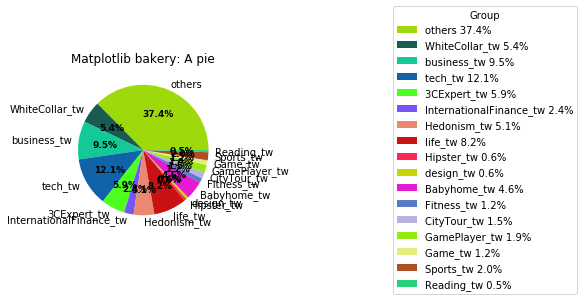

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = [v for x,v in dict_grp.items()]
ingredients = [x+ ' {:.1f}%'.format(v/total_news*100) for x,v in dict_grp.items()]
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
         for i in range(len(dict_grp))]
labels = dict_grp.keys()
size = dict_grp.values()
wedges, texts, autotexts = ax.pie(data, labels = labels,colors = colors,autopct='%1.1f%%')

ax.legend(wedges, ingredients,
          title="Group",
          loc="center left",
          bbox_to_anchor=(2, 0, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

In [39]:
import time
from datetime import datetime
import pandas as pd
for i in range(0,total_news):
    question_time =  dict_item['publishtime'][i]*0.001
    #print(datetime.fromtimestamp(question_time).strftime('%Y-%m-%d %H:%M:%S'))
    dict_item['publishtime'][i] = datetime.fromtimestamp(question_time).strftime('%Y-%m-%d %H:%M:%S')

raw_data = {'title': dict_item['title'],
            'publishtime': dict_item['publishtime']}
df = pd.DataFrame(raw_data, columns = ['title','publishtime'])
#df.to_csv('final.csv')
df

,title,publishtime
0,瘋狂的點子如何成功？至少死三次，挺過走黴運的日子——《高勝率創新》 - PanX 泛科技,2020-02-20 12:00:55
1,LINE 電腦版新功能，遠距工作更方便 | TechNews 科技新報,2020-02-20 12:03:06
2,遠離地球！SpaceX 宣佈 2022 年送 4 名遊客上太空，高度是國際太空站 2 倍 |...,2020-02-20 10:38:46
3,5G 升級前夕，電信業檯面下固樁再戰 499 | TechNews 科技新報,2020-02-20 09:14:37
4,「調味品」的英文怎麼說？ | 經理人,2020-02-20 09:05:37
...,...,...
495,俄羅斯全面禁止中港澳公民入境 瘟疫扼殺中國的「一帶一路」 | 信傳媒,2020-02-20 08:53:56
496,武漢肺炎》越南臺資企業中國幹部多 這裡的臺商會成為防疫破口？ | 信傳媒,2020-02-20 08:53:56
497,出國上網方案美國實測：AIRSIM 網卡不僅能上網還能語音通話、彈性儲值更方便 (15179...,2020-02-20 08:41:00
498,疫情來亂，你也開了N個緊急會議嗎？KKday行銷長這半個月是這樣做的｜商周,2020-02-20 08:40:00


In [54]:
import re
from bs4 import BeautifulSoup
def url_path_to_dict(path):
    pattern = (r'^'
               r'((?P<schema>.+?)://)?'
               r'((?P<user>.+?)(:(?P<password>.*?))?@)?'
               r'(?P<host>.*?)'
               r'(:(?P<port>\d+?))?'
               r'(?P<path>/.*?)?'
               r'(?P<query>[?].*?)?'
               r'$'
               )
    regex = re.compile(pattern)
    m = regex.match(path)
    d = m.groupdict() if m is not None else None

    return d


In [153]:
def crawl(url,description,result,i):
   
    article=""
    #url=j['items'][idx]['linkurl']
    #description=j['items'][idx]['description']
    #print(description)
    #j['items'][idx]['linkurl']
    #print(url)
    dict_url=url_path_to_dict(url)
    #print(dict_url)
    #if(dict_url['host']=='www.jiqizhixin.com'):
    #    return
    
    try:
        response = requests.get(url,timeout=4)        
    except(ConnectionError, Exception)as e:
        print(url)
        print("Exception is :", e)
        article=description
        result[i] = article
    else:    
        r = requests.get(url)
        soup = BeautifulSoup(r.text, "html5lib")
    
        if(dict_url['host']=='technews.tw'):
            for t in soup.find(attrs={"class": "indent"}).find_all('p'):
                if(t.text!=''):
                    #print(t.text)
                    article=article+(t.text)
        elif(dict_url['host']=='www.managertoday.com.tw'):
            if soup.find(attrs={"class": "htmlview"}):
                for t in soup.find(attrs={"class": "htmlview"}).find_all('p'):
                    #print(t.text)
                    article=article+(t.text)
            elif soup.find(attrs={"itemprop":"articleBody"}):
                for t in soup.find(attrs={"itemprop":"articleBody"}).find_all('p'):
                    #print(t.text)
                    article=article+(t.text)
            else:
                article = description
        
        elif(dict_url['host']=='chinese.engadget.com'):
            try:
                soup.find(attrs={"data-testid": "PostContentContainer"}).find_all('div',attrs={"class": ""})
            except:
                print("except",url)
                article = description
            else:
                for t in soup.find(attrs={"data-testid": "PostContentContainer"}).find_all('div',attrs={"class": ""}):
                    #print(t.text)
                    article=article+(t.text)
        elif(dict_url['host']=='www.knowledger.info'):
            if soup.find(attrs={"class": "short"}):
                for t in soup.find(attrs={"class": "short"}).find_all('p'):
                    #print(t)
                    if(t.find(attrs={"class": "postedby"})):           
                        continue
                    if('style' in  t.attrs and t['style']=='text-align: right;'):            
                        continue
                    if(t.text!=''):
                        #print(t.text)
                        article=article+(t.text)
            else:
                article = description
        elif(dict_url['host']=='www.storm.mg'):
            if soup.find(attrs={"class": "article_content_inner"}):
                for t in soup.find(attrs={"class": "article_content_inner"}).find_all('p'):
                    if(t.text=='\xa0'):
                        continue
                    if(t.find(attrs={"class": "related_copy_content"})):
                        continue
                    if(t.text!=''):
                        #print(t.text)
                        article=article+(t.text)
            else:
                article = description

        
        elif(dict_url['host']=='www.projectup.net'):
            if soup.find(attrs={"class": "post_content"}):
                for t in soup.find(attrs={"class": "post_content"}).find_all('p'):
                    #print(t)
                    #if(t.find('br')):
                     #   continue
                    if(t.text!='\xa0'):
                        #print(t.text)
                        article=article+(t.text)
            else:
                article = description
        elif(dict_url['host']=='www.smartm.com.tw'):
            for t in soup.find_all(attrs={"class": "Paragraph"}):
                #print(t.text)
                article=article+(t.text)
        elif(dict_url['host']=='free.com.tw'):
            for t in soup.find(attrs={"class": "dable-content-wrapper"}).find_all('p'):
                if(t.text=='\xa0'):
                    continue
                if(t.text!=''):
                    #print(t.text)
                    article=article+(t.text)
        elif(dict_url['host']=='www.thenewslens.com'):
            if soup.find(attrs={"class": "article-content"}):
                for t in soup.find(attrs={"class": "article-content"}).find_all('p'):
                    #print(t.text)
                    if(t.text[:5]==u'新聞來源：'):
                        break
                    article=article+(t.text)
            else:
                article = description
        elif(dict_url['host']=='qooah.com'):    
            for t in soup.find(attrs={"class": "td-post-content"}).find_all('p'):
                if(t.text!=''):
                    #print(t.text)
                    article=article+(t.text)
        elif(dict_url['host']=='www.techbang.com'):
            if soup.find(attrs={"class": "article-content"}):
                for t in soup.find(attrs={"class": "article-content"}).find_all('p'):
                    if(t.text=='\xa0'):
                        continue
                    if(t.text!=''):
                        #print(t.text)
                        article=article+(t.text)
            else:
                article = description                
        elif(dict_url['host']=='crossing.cw.com.tw'):    
            for t in soup.find(attrs={"class": "trackSection"}).find_all('p'):
                if(t.text=='\xa0'):
                    continue
                if(t.text!=''):
                    #print(t.text)
                    article=article+(t.text)
        elif(dict_url['host']=='www.darencademy.com'):    
            for t in soup.find(attrs={"class": "post_content"}).find_all('p'):
                if(t.text=='\xa0'):
                    continue
                if(t.text!=''):
                    #print(t.text)
                    article=article+(t.text)
        elif(dict_url['host']=='buzzorange.com'):
            for t in soup.find(attrs={"class": "entry-content"}).find_all('p'):
                if(t.text=='\xa0'):
                    continue
                if(t.text[:5]==u'延伸閱讀：'):
                    break
                if(t.text!=''):
                    #print(t.text)
                    article=article+(t.text)
        elif(dict_url['host']=='www.ithome.com.tw'):
            if soup.find(attrs={"class": "content"}):
                for t in soup.find(attrs={"class": "content"}).find_all('p'):
                    #print(t.text)
                    if(t.text=='\xa0'):
                        continue
                    if(t.text!=''):                
                        article=article+(t.text)
            else:
                article = description
        else:
            print(dict_url['host'])
            article = description
        
        result[i] = article
        
        #print(i,url,dict_url['host'],description)

In [142]:
def no(result,i,title):    
    result[i] = title

In [154]:
from threading import Thread

threads = [None] * 500
results = [None] * 500
#range(len(threads))
for i in range(0,500):
    if 'description' in total_api['items'][i].keys():
        threads[i] = Thread(target=crawl, args=(total_api['items'][i]['linkurl'], total_api['items'][i]['description'],results, i))
        threads[i].start()
    else:                
        threads[i] = Thread(target=no, args=(results, i,total_api['items'][i]['title']))
        threads[i].start()
    #else:
        #threads[i] = Thread(target=crawl, args=(total_api['items'][i]['linkurl'], total_api['items'][i]['title'],results, i))
        #threads[i].start()
# do some other stuff

for i in range(0,500):
    threads[i].join()

#print (" ".join(results))

#print(j['items'][74]['description'])

user78003.psee.io
www.inside.com.tw
flipermag.com
www.inside.com.tw
www.inside.com.tw
panx.asia
www.inside.com.twwww.bnext.com.tw

www.inside.com.tw
www.inside.com.tw
www.inside.com.tw
https://www.jiqizhixin.com/articles/2020-02-20-12https://www.jiqizhixin.com/articles/2020-02-20
Exception is : HTTPSConnectionPool(host='www.jiqizhixin.com', port=443): Max retries exceeded with url: /articles/2020-02-20 (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x000002C69074D1C8>, 'Connection to www.jiqizhixin.com timed out. (connect timeout=4)'))

Exception is : HTTPSConnectionPool(host='www.jiqizhixin.com', port=443): Max retries exceeded with url: /articles/2020-02-20-12 (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x000002C697030388>, 'Connection to www.jiqizhixin.com timed out. (connect timeout=4)'))
www.inside.com.tw
pansci.asiawww.bnext.com.tw

www.bnext.com.tw
https://startuplatte.com/2020/02/19/5-31-reggie-mille

In [158]:
import jieba
import jieba.analyse
def analyse(article,tagResult,i):
    topK = 3
    tags = jieba.analyse.textrank(article, topK=topK)
    
    tagResult[i] =  " ".join(tags)

In [159]:
threads = [None] * 500
tagResults = [None] * 500

for i in range(len(threads)):
    threads[i] = Thread(target=analyse, args=(results[i], tagResults, i))
    threads[i].start()

# do some other stuff

for i in range(len(threads)):
    threads[i].join()

#print (" ".join(results))
for i in range(0,500):
    print (i, tagResults[i])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ELLEN_~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.560 seconds.
Prefix dict has been built successfully.


0 點子 產品 藥物
1 功能 通話 電腦
2 太空 外太空 公司
3 用戶 台灣 客戶
4 味品 好吃 因素
5 準備 迎接 挑戰
6 蘋果 訂閱 服務
7 電腦 個人 採用
8 手機 首款 設計
9 應用 存取 位置
10 美國 工作 問題
11 方式 企業 不能
12 展會 帶來 取消
13 中國 工作 企業
14 工具 功能 桌機
15 冰毒 北韓 毒品
16 手機 設計 螢幕
17 系統 開發 版本
18 時候 沒有 樣子
19 表格 利用 試算
20 系統 影響 業務
21 用戶 容器 支援
22 研究 學習 深入
23 批判 神經 看待
24 提前 審稿 可能
25 提交 病毒基因 論文
26 直播 領域 政治
27 資料 系統 使用
28 英國 運算 全球
29 資料 服務 應用
30 美國 民主 郵件
31 郵輪 隔離 進行
32 韌體 驗證 漏洞
33 大學 研究 人員
34 硬體 更換 功能
35 系統 營運 演練
36 需求 薪水 員工
37 棉花 精度 師用
38 網路 攻擊 組織
39 機器 類型 工作
40 時間 支援 測試
41 減少 勞工 疫情
42 人力 影響 全球
43 流量 IP地址 網路
44 遊卡 銀行 琉球
45 高端 語法 掌握
46 
47 標準 可能 原因
48 立體 監督 提出
49 技術 愛爾蘭 子公司
50 成本 現金 影響
51 理解 背景 理論
52 問題 分析 技術
53 高度 飛行 記錄
54 廣播 網站 資訊
55 儲存 開源 硬體
56 設計 技術 需求
57 設計 核心 開發
58 晶片 採用 系統
59 設計 架構 發展
60 設計 指令 硬體
61 設計 應用 開源
62 設計 晶片
63 硬體 開源 設計
64 服務 員工 轉型
65 發者 推出 了開
66 螢幕 玻璃 耐用度
67 用戶 服務 相信
68 面臨 生鮮 零售
69 駕駛 自動 電腦
70 限制 螢幕 時間
71 全球 企業 追平
72 日本 乘客 感染
73 糙米 菲律賓 營養
74 考試 停課 人員
75 口罩 皮膚 手部
76 中國 介石 政府
77 骨齡 治療 孩子
78 研究 人類 胚胎
79 題目 數學 競賽
80 防疫 補償 隔離
81 穿越 理論 想見
82 
83 波特 機師 事件
84 免費 服務 收錄


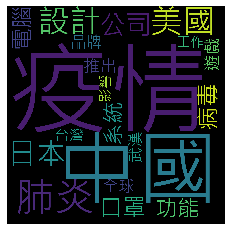

In [166]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

alltags=""
for i in range(0,500):
    alltags = alltags +tagResults[i]
    alltags = alltags +" "
#print(alltags)
font = r'C:\Windows\Fonts\msjh.ttc'
wc = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2,max_words=20).generate(alltags)

plt.imshow(wc)
plt.axis("off")
plt.show()


In [148]:
print(len(dict_grp))
weight_ori = 1/(len(dict_grp)+3)
colors_ori = [1.0,1.0,1.0]
colors = []
for w in range(len(dict_grp)):
    weight= weight_ori*(w+1)
    a = (colors_ori[0]-weight,colors_ori[1]-weight,colors_ori[2]-weight)
    colors.append(a)
print(colors)

17
[(0.95, 0.95, 0.95), (0.9, 0.9, 0.9), (0.85, 0.85, 0.85), (0.8, 0.8, 0.8), (0.75, 0.75, 0.75), (0.7, 0.7, 0.7), (0.6499999999999999, 0.6499999999999999, 0.6499999999999999), (0.6, 0.6, 0.6), (0.55, 0.55, 0.55), (0.5, 0.5, 0.5), (0.44999999999999996, 0.44999999999999996, 0.44999999999999996), (0.3999999999999999, 0.3999999999999999, 0.3999999999999999), (0.35, 0.35, 0.35), (0.29999999999999993, 0.29999999999999993, 0.29999999999999993), (0.25, 0.25, 0.25), (0.19999999999999996, 0.19999999999999996, 0.19999999999999996), (0.1499999999999999, 0.1499999999999999, 0.1499999999999999)]
